In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np

In [22]:
#reading the dataset
df = pd.read_csv('distinct_song.csv')
df.head(3)

,Unnamed: 0,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,2,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,76cy1WJvNGJTj78UqeA5zr,4.0
1,23,Selena Gomez,Back To You,189227,2020-05-29 13:23:00,0.601,0.724,6.0,-4.856,1.0,0.0486,0.0945,0.000002,0.1200,0.508,102.061,4hQ6UGyWQIGJmHSo0J88JW,4.0
2,29,Ed Sheeran,Beautiful People (feat. Khalid),176352,2020-05-29 13:42:00,0.640,0.648,5.0,-8.113,0.0,0.1870,0.1240,0.000000,0.0802,0.548,92.977,4evmHXcjt3bTUHD1cvny97,4.0


In [23]:
#dropping Some of the extra columns
df = df.drop(columns=['Unnamed: 0', 'datetime', 'id'])
df.head(3) 

,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Dua Lipa,IDGAF,213981,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,4.0
1,Selena Gomez,Back To You,189227,0.601,0.724,6.0,-4.856,1.0,0.0486,0.0945,0.000002,0.1200,0.508,102.061,4.0
2,Ed Sheeran,Beautiful People (feat. Khalid),176352,0.640,0.648,5.0,-8.113,0.0,0.1870,0.1240,0.000000,0.0802,0.548,92.977,4.0


In [24]:
#Grabbing jsut the columns which are required columns
x = df[['danceability', 'energy', 'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

In [25]:
#Standardizing the Variables

In [28]:
from sklearn import preprocessing

In [29]:
#Feature Scaling the data
x_scaled = preprocessing.scale(x)

### DIMENSIONALITY REDUCTION AND VISUALIZATION ( TSNE)

In [26]:
from sklearn.manifold import TSNE

In [30]:
X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

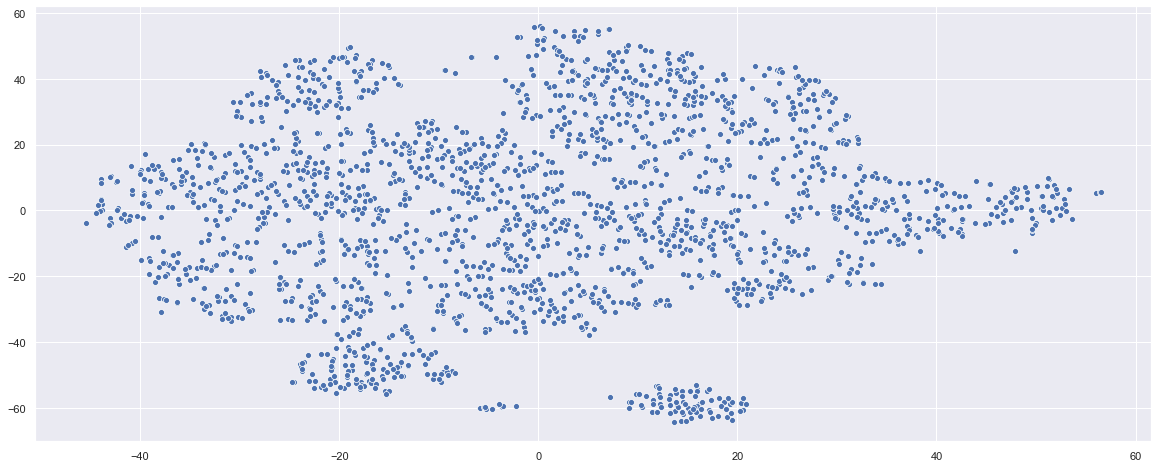

In [35]:
rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

In [34]:
data = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

### K MEANS

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[19214.99999999997,
 16048.157528145246,
 14370.558756231141,
 12869.825313340627,
 11654.800055839994,
 10700.762661110504,
 9982.854575306192,
 9323.585529738382,
 8799.76831237772,
 8474.849199677154]

In [1]:
#Elbow method

Text(0, 0.5, 'WCSS')

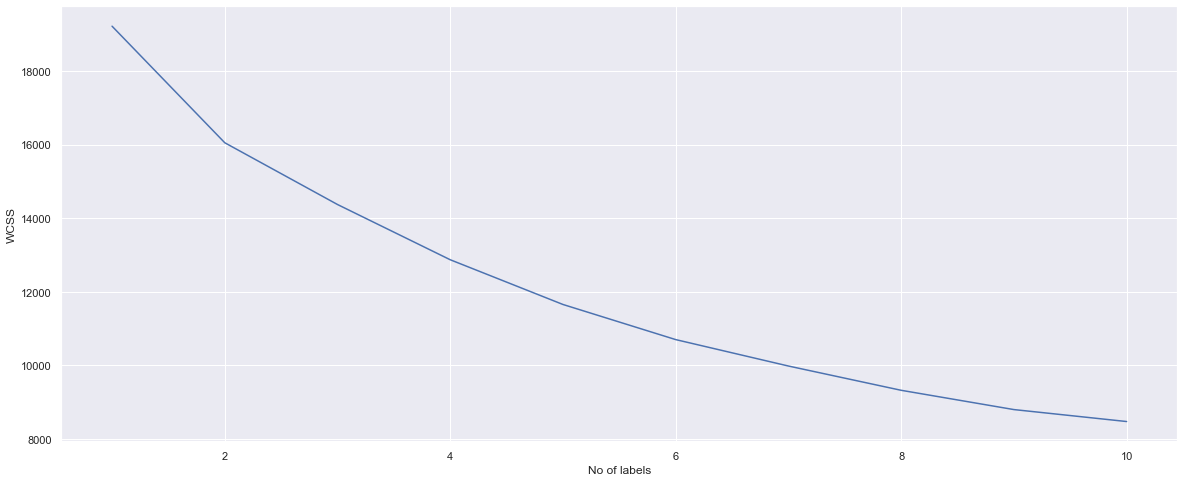

In [38]:
sns.lineplot(range(1,11), wcss)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

In [2]:
#Lets see the Clusters

In [39]:
kmeans_model = KMeans(6)
kmeans_model.fit(x_scaled)
data['kmeans']=kmeans_model.fit_predict(x_scaled)

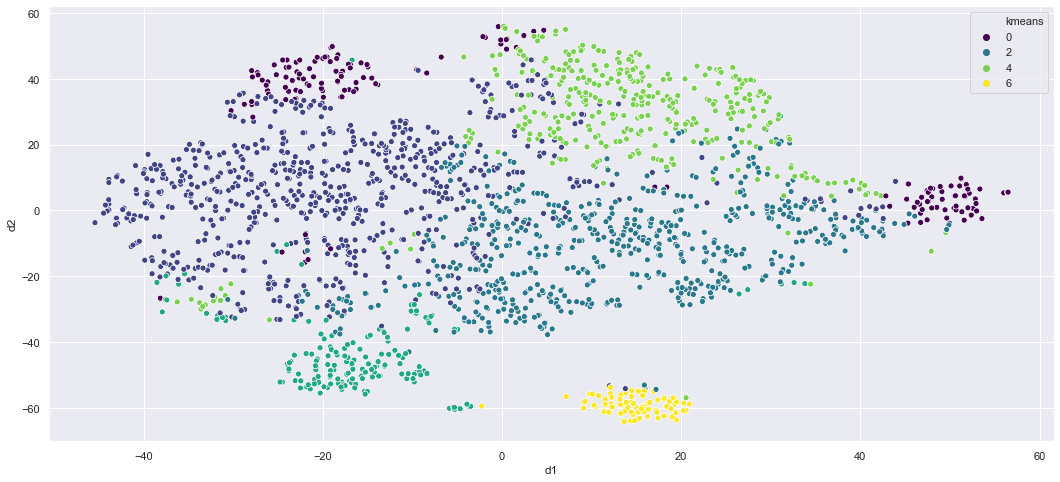

In [41]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='kmeans', palette='viridis')

### AGGLOMERATIVE  CLUSTERING

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
model_agg = AgglomerativeClustering(n_clusters=6)
model_agg.fit(x_scaled)
data['agg']=model_agg.fit_predict(x_scaled)

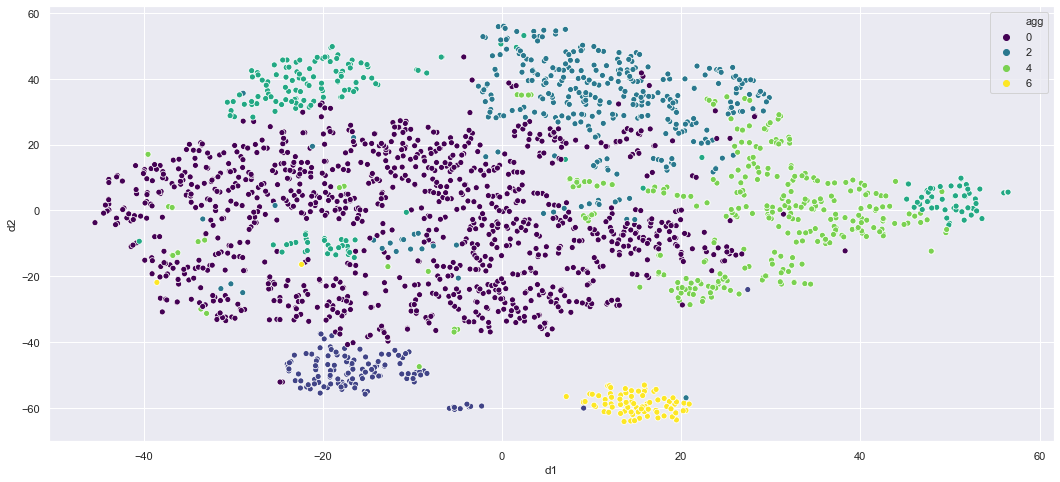

In [44]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='agg', palette='viridis')

### Affinity Propagation Clustering

In [46]:
from sklearn.cluster import AffinityPropagation

In [47]:
model_ap = AffinityPropagation(damping=0.9)
model_ap.fit(x_scaled)
data['ap'] = model_ap.predict(x_scaled)

C:\Users\Shardha\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\Shardha\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\Shardha\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:449: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn("This model does not have any cluster centers "


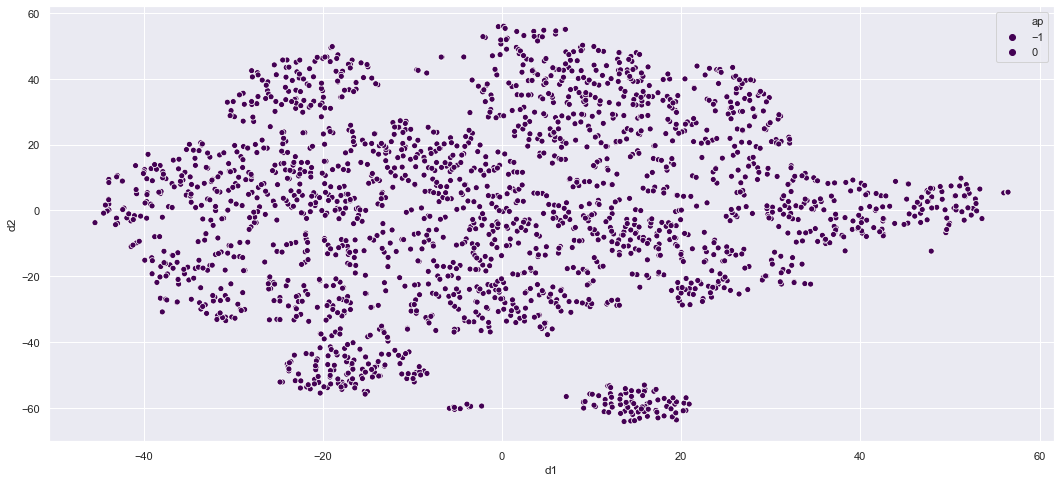

In [48]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='ap', palette='viridis')

### BIRCH

In [49]:
from sklearn.cluster import Birch

In [50]:
model_birch = Birch(threshold=0.01, n_clusters=4)
model_birch.fit(x_scaled)
data['birch'] = model_birch.predict(x)

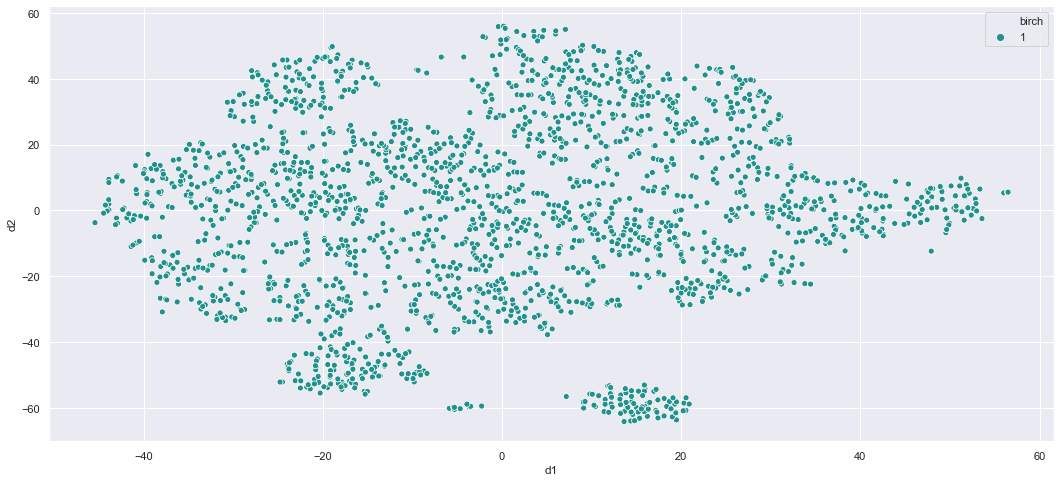

In [51]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='birch', palette='viridis')

In [3]:
#Which ever cluster number I am providing this algorithm is making only 1 cluster.
# Hence this algorithm is not performing well for our dataset

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
model_dbscan = DBSCAN(eps=0.30, min_samples=9)
data['dbscan'] = model_dbscan.fit_predict(x)

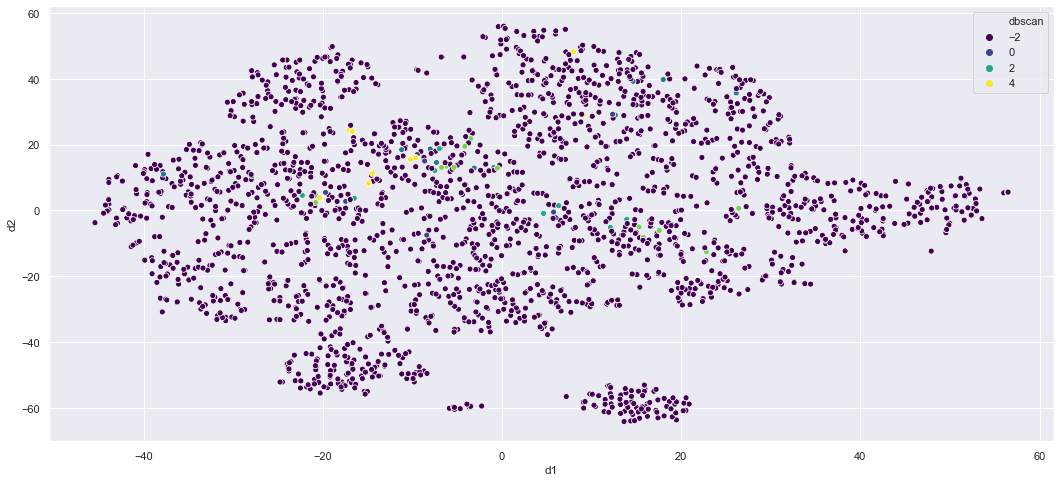

In [54]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='dbscan', palette='viridis')

In [55]:
from sklearn.cluster import MiniBatchKMeans

In [56]:
model_minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
model_minibatch_kmeans.fit(x_scaled)
data['minibatch_kmeans'] = model_minibatch_kmeans.predict(x)

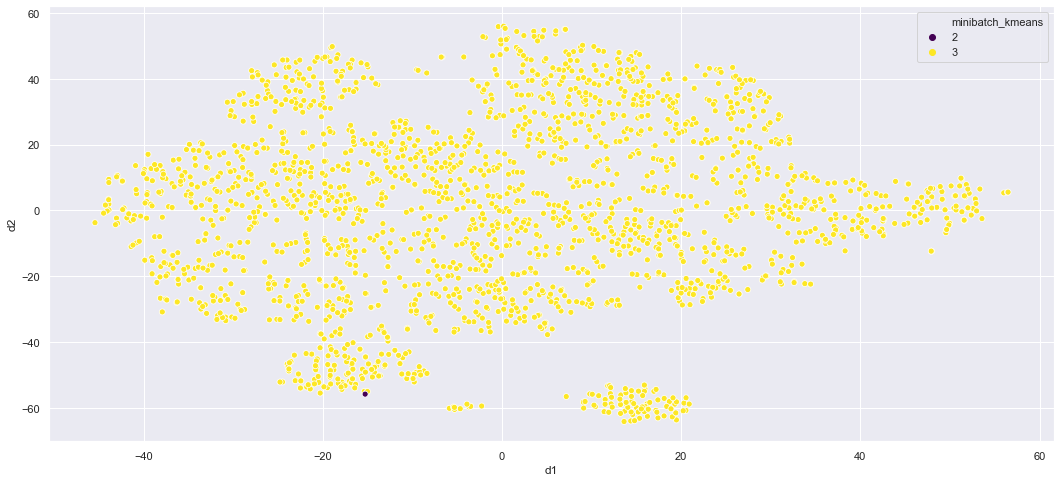

In [57]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='minibatch_kmeans', palette='viridis')

In [58]:
x= x.join(data['agg'])
x.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,agg
0,0.836,0.544,-5.975,0.0943,0.0403,0.000000,0.0824,0.510,97.028,0
1,0.601,0.724,-4.856,0.0486,0.0945,0.000002,0.1200,0.508,102.061,0
2,0.640,0.648,-8.113,0.1870,0.1240,0.000000,0.0802,0.548,92.977,3


In [64]:
average = x.groupby('agg').mean().reset_index()
average

,agg,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.674057,0.725457,-5.388399,0.060634,0.144548,0.003742,0.133256,0.520106,112.267925
1,1,0.500312,0.309547,-11.057132,0.047426,0.778017,0.085131,0.141116,0.299229,113.580909
2,2,0.705783,0.786238,-5.009220,0.085908,0.080379,0.007473,0.361078,0.560929,118.727663
3,3,0.701264,0.707223,-6.176345,0.271538,0.165726,0.004306,0.139713,0.550213,128.162254
4,4,0.539745,0.716869,-5.408539,0.073685,0.128810,0.005020,0.196238,0.453326,151.602377
5,5,0.672253,0.762684,-7.015848,0.067448,0.082396,0.678278,0.185319,0.392234,123.715823


In [66]:
df = df.join(data['agg'])

### CLUSTERS 

### CLUSTER 0

**Features**

danceability | energy
--- | ---
0.59	| 0.72

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.13	| 0.002

loudness | liveness
--- | ---
-5.36 | 0.14

valence	| tempo
--- | ---
0.39 | 124.5



In [4]:
# Description:
# As per the features, cluster 0 contains energetic songs with more of beats
# (mediocre beats/minute) and less of acouticness and instrumentalness. 
# Moreover, these songs have a little sad and gloomy lyrics. (Beats + Gloomy)


In [5]:
# Few of the songs in this cluster 0  are :

In [71]:
cluster_0 = df.loc[ df['agg'] == 0, ['artistName', 'trackName']]
cluster_0.sample(5)

,artistName,trackName
1274,Julia Michaels,Lie Like This
1968,Lukas Graham,Mama Said
1315,Marc Benjamin,Start Over Again (feat. Vula)
1588,Rita Ora,Body on Me (feat. Chris Brown)
125,Chris Classic,Witch Doctor


 ### CLUSTER 1

**Features**

danceability | energy
--- | ---
0.63	| 0.68

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.18	| 0.65

loudness | liveness
--- | ---
-8.39 | 0.14

valence	| tempo
--- | ---
0.36 | 122.5


In [6]:
# Description  
# As per the features, cluster 1 contains energetic songs with more of beats (mediocre beats/minute)
# and less of acouticness and speechiness. Moreover, these songs have a little sad and gloomy lyrics. (Beats + Gloomy)
# However, the only difference with cluster 0 is the instrumentalness. 
# Along with beats and energy the song have lot of instrument sounds.

In [7]:
# Few of the songs in this cluster 1  are :

In [74]:
cluster_1 = df.loc[ df['agg'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

,artistName,trackName
74,Dan + Shay,Speechless (feat. Tori Kelly)
1297,The Wanted,Only You
551,Sam Smith,Diamonds - Acoustic
1994,Jake Miller,I HOPE I DIE FIRST
681,Lvly,Next to Me (Acoustic Version)


### Cluster 2

**Features**


danceability | energy
--- | ---
0.74    | 0.70

speechiness |acousticness | instrumentalness
--- | --- | ---
0.06   | 0.16   | 0.001

loudness | liveness
--- | ---
-5.46 | 0.12

valence | tempo
--- | ---
0.68 | 116.09

In [19]:
# Description 
# As per the features, cluster 2 contains energetic songs with more of beats (mediocre beats/minute) 
# and less of acouticness and instrumentalness. Moreover, these songs have a happy lyrics. (Beats + haapy)

In [23]:
# Few of the songs in this cluster 2 are:

In [22]:
# cluster_2 = df.loc[ df['agg'] == 2, ['artistName', 'trackName']]
# cluster_2.sample(5)

### Cluster 3

**Features**


danceability | energy
--- | ---
0.69	| 0.70

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.26	| 0.19	| 0.003

loudness | liveness
--- | ---
-6.06 | 0.13

valence	| tempo
--- | ---
0.55 | 127.86

In [ ]:
# Description 
# As per the features, cluster 3 contains energetic songs with more of beats (mediocre beats/minute)
# and less of acouticness and instrumentalness. Moreover, these songs have lyrics which are neutral. *(Beats + neutral)*

In [24]:
# Few of the songs in this cluster 3 are:

In [ ]:
# cluster_3 = df.loc[ df['agg'] == 3, ['artistName', 'trackName']]
# cluster_3.sample(5)

### Cluster 4

**Features**


danceability | energy
--- | ---
0.67	| 0.75

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.07	| 0.12	| 0.002

loudness | liveness
--- | ---
-5.15 | 0.36

valence	| tempo
--- | ---
0.54 | 115.85

In [25]:
# Description  
# As per the features, cluster 4 contains energetic songs with more of beats (mediocre beats/minute)
# and less of acouticness and instrumentalness. Moreover, these songs have neutral lyrics (Beats + haapy)


In [26]:
# Few of the songs in this cluster 4 are:

In [27]:
# cluster_4 = df.loc[ df['agg'] == 4, ['artistName', 'trackName']]
# cluster_4.sample(5)

### Cluster 5

**Features**


danceability | energy
--- | ---
0.54	| 0.36

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.04	| 0.72	| 0.007

loudness | liveness
--- | ---
-9.25 | 0.12

valence	| tempo
--- | ---
0.35 | 107.99

In [29]:
# Description
# As per the features, cluster 5 contains low energetic songs with less  of beats and more of acouticness 
# and instrumentalness. Moreover, these songs have a sad lyrics (Acoustic + sad)

In [30]:
# Few of the songs in this cluster 5 are:

In [31]:
# cluster_5 = df.loc[ df['agg'] == 5, ['artistName', 'trackName']]
# cluster_5.sample(5)